In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [2]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')

injury_df.head()

In [ ]:
# 포지션 상관관계 알기위해  포지션 인코딩 하기

In [25]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree     import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [37]:
item_label  = list(injury_df.groupby('position').agg({'position':'count'}).index)

encoder = LabelEncoder()
encoder.fit(item_label)

digit_label = encoder.transform(item_label)
print('encoder 결과', digit_label)

print('decoder 결과', encoder.inverse_transform(digit_label))

digit_label = digit_label.reshape(-1,1)
print(digit_label)
print(digit_label.shape)

encoder 결과 [0 1 2 3 4 5 6]
decoder 결과 ['C' 'C-F' 'F' 'F-C' 'F-G' 'G' 'G-F']
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(7, 1)


In [38]:
ont_hot_encoder = OneHotEncoder()
ont_hot_encoder.fit(digit_label)
ont_hot_label = ont_hot_encoder.transform(digit_label)
print(ont_hot_label.toarray())
print(ont_hot_label.shape)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(7, 7)


In [27]:
pd.get_dummies(injury_df)

,age,season,Notes,name_Aaron Brooks,name_Aaron Gray,name_Adam Morrison,name_Adonal Foyle,name_Al Harrington,name_Al Jefferson,name_Allen Iverson,...,name_Zach Randolph,name_Zaza Pachulia,name_Zydrunas Ilgauskas,position_C,position_C-F,position_F,position_F-C,position_F-G,position_G,position_G-F
0,37,18,50.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,41,16,44.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,16,43.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,36,14,36.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,36,11,35.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,38,9,35.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,32,5,34.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,36,12,30.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,36,12,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,37,17,27.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
def posi_digt(x,item_label,digit_label):
    for idx, value in enumerate(item_label):
        if x == value:
            return digit_label[idx][0]

In [34]:
injury_df['position_digtt'] = injury_df['position'].apply(lambda x:posi_digt(x,item_label,digit_label))
injury_df.head()

,name,age,season,Notes,position,position_digtt
0,Tony Parker,37,18,50.0,G,5
1,Manu Ginobili,41,16,44.0,G,5
2,Dwyane Wade,37,16,43.0,G,5
3,Andrew Bogut,36,14,36.0,C,0
4,Sean Marks,36,11,35.0,F-C,3


In [35]:
def corr(data,text):
    corr = data.corr(method='pearson')
    display(corr)
    style.use('ggplot')
    plt.title(text)
    sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

,age,season,Notes,position_digtt
age,1.000000,0.717622,0.247140,0.068248
season,0.717622,1.000000,0.436517,-0.021512
Notes,0.247140,0.436517,1.000000,-0.068136
position_digtt,0.068248,-0.021512,-0.068136,1.000000


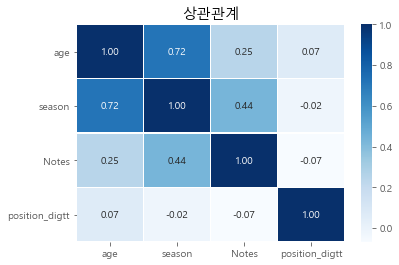

In [36]:
corr(injury_df,'상관관계')